In [192]:
import numpy as np
import pandas as pd
import scipy as sp
import matplotlib.pyplot as plt

In [193]:
import os
print(os.listdir('data'))

['drugsComTest_raw.tsv', 'drugsComTrain_raw.tsv']


In [219]:
train_data = pd.read_csv('data/drugsComTrain_raw.tsv', sep='\t')
test_data = pd.read_csv('data/drugsComTest_raw.tsv', sep='\t')

# list data dimension
print(train_data.shape)
print(test_data.shape)

(161297, 7)
(53766, 7)


In [220]:
train_data.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [221]:
# convert date format
train_data.date = pd.to_datetime(train_data.date)

Text(0.5, 1.0, 'Top20 drugs used condition')

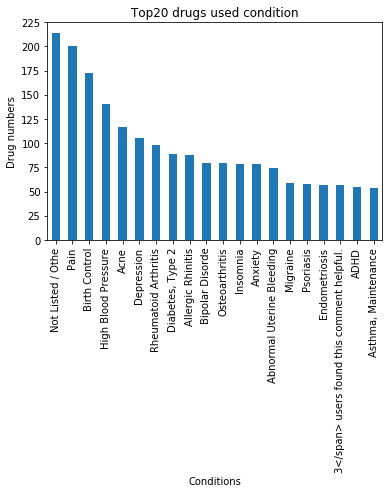

In [222]:
# number of drug per condition
df_drugPerCond = train_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
df_drugPerCond[0:20].plot(kind="bar")
plt.xlabel("Conditions")
plt.ylabel("Drug numbers")
plt.title("Top20 drugs used condition")

前20個使用藥品數量(drug numbers)最多的狀況(conditions)中，有一項  3 < /span>  users found this comment helpful ，並非一般所認定之情形，先行移除。

In [233]:
# remove 
for i, data in enumerate(train_data['condition']):
    if '</span>' in data:
        print(data)
    
#train_data = train_data[train_data.condition != '3</span> users found this comment helpful.']
#train_data = train_data[train_data.condition != 'Not Listed / Othe']

TypeError: argument of type 'float' is not iterable

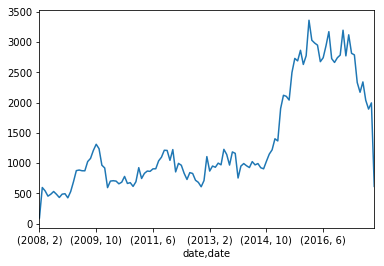

In [229]:
# reviews per month
df_ReviewPerMon = train_data.copy()

df_ReviewPerMon = df_ReviewPerMon.groupby([df_ReviewPerMon.date.dt.year, df_ReviewPerMon.date.dt.month])
df_ReviewPerMon.size().plot()

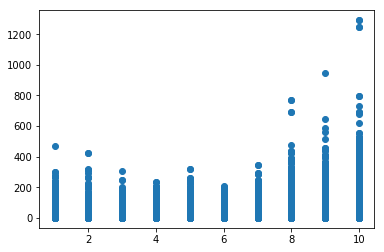

In [138]:
# distribute of rating and usefulCount
df_RatingUseful = train_data[['rating', 'usefulCount']]
df_RatingUseful = df_RatingUseful.set_index('rating')
df_RateUseful.head()

plt.plot(df_RatingUseful, 'o')
plt.show()

<BarContainer object of 882 artists>

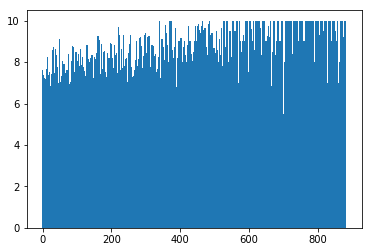

In [170]:
# drug/condition pair average rating
t = []
df_drugPerCond = train_data.groupby(['condition'])['drugName'].nunique().sort_values(ascending=False)
x = [i for i in range(0,len(df_drugPerCond.index))]
for index in df_drugPerCond.index:
    t.append(train_data[train_data.condition == index]['rating'].mean())
plt.bar(x, t, 3.5)


## data preprocess

In [ ]:
# 

In [179]:
# encode drug name
drug_id = pd.factorize(train_data.drugName)
train_data.drugName = drug_id[0]

In [180]:
# encode condition name
condition_id = pd.factorize(train_data.condition)
train_data.condition = condition_id[0]